<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Minning_Vector_AutoR_egressionand_Panel_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install arch
!pip install linearmodels
!pip install statsmodels
!pip install tabulate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.2 MB/s eta 0:00:00


#### Minning VECTOR AUTOREGRESSION AND PANEL REGRESSION

### V2

--- 1. Setup and Data Loading ---
Fama-French data loaded successfully.
ESG data for U.S. Mining Sector (or Expanded Scope) loaded successfully from original source.
Tickers found in ESG data: ['ALB', 'ALTM', 'FCX', 'ILKAF', 'LAC', 'LYSCF', 'MP', 'PILBF', 'SGML', 'SQM', 'UUUU']
Attempting to download stock prices for 11 tickers from 2014-08-01 00:00:00 to 2025-04-02 00:00:00


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALTM']: HTTPError('HTTP Error 404: ')


No data returned for ALTM by yfinance.

Stock prices downloaded for 10 tickers.
Missing tickers: ['ALTM']

--- 2. Data Preprocessing ---
Shape of cleaned data for analysis (final_df_cleaned): (363, 29)
Number of unique tickers in final_df_cleaned: 3
Date range in final_df_cleaned: 2015-03-01 00:00:00 to 2025-03-01 00:00:00


--- 3. Model Selection for Panel Data and Diagnostic Tests ---

**Table: Panel Model Specification Tests Summary**
+----------------------------------+-------------+-------------------------------------+-------------------------------------+
| Test                             | Statistic   | P-value/Note                        | Conclusion                          |
+==================================+=============+=====================================+=====================================+
| F-test (Entity FE vs Pooled OLS) | 0.1416      | 0.8681                              | Entity FE not significant           |
+----------------------------------+-------------+

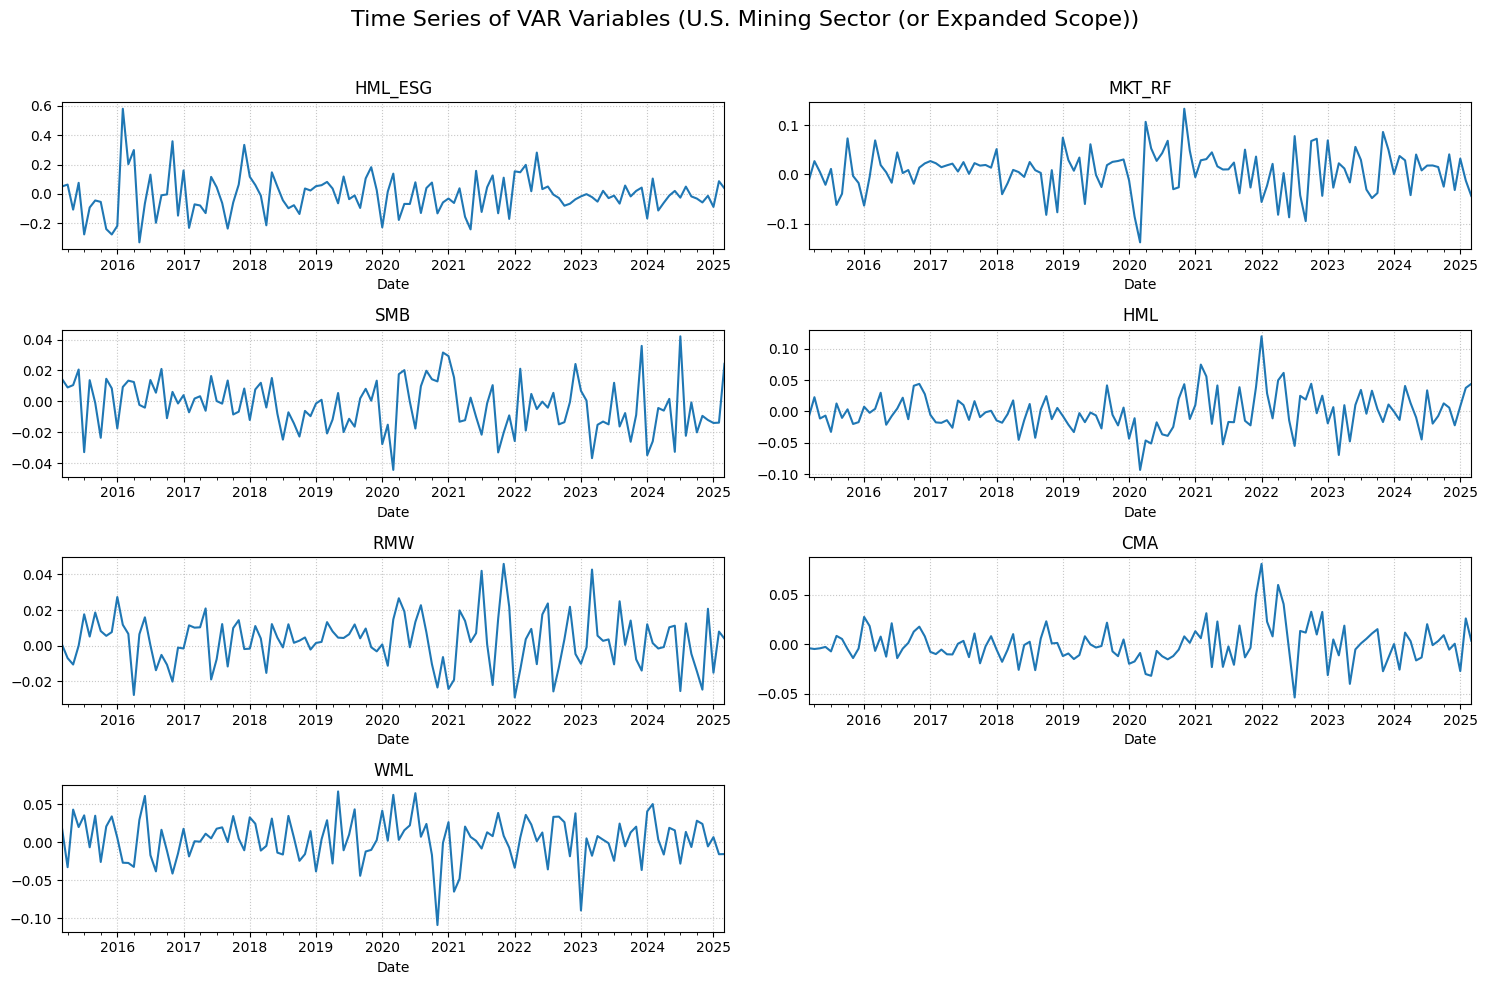

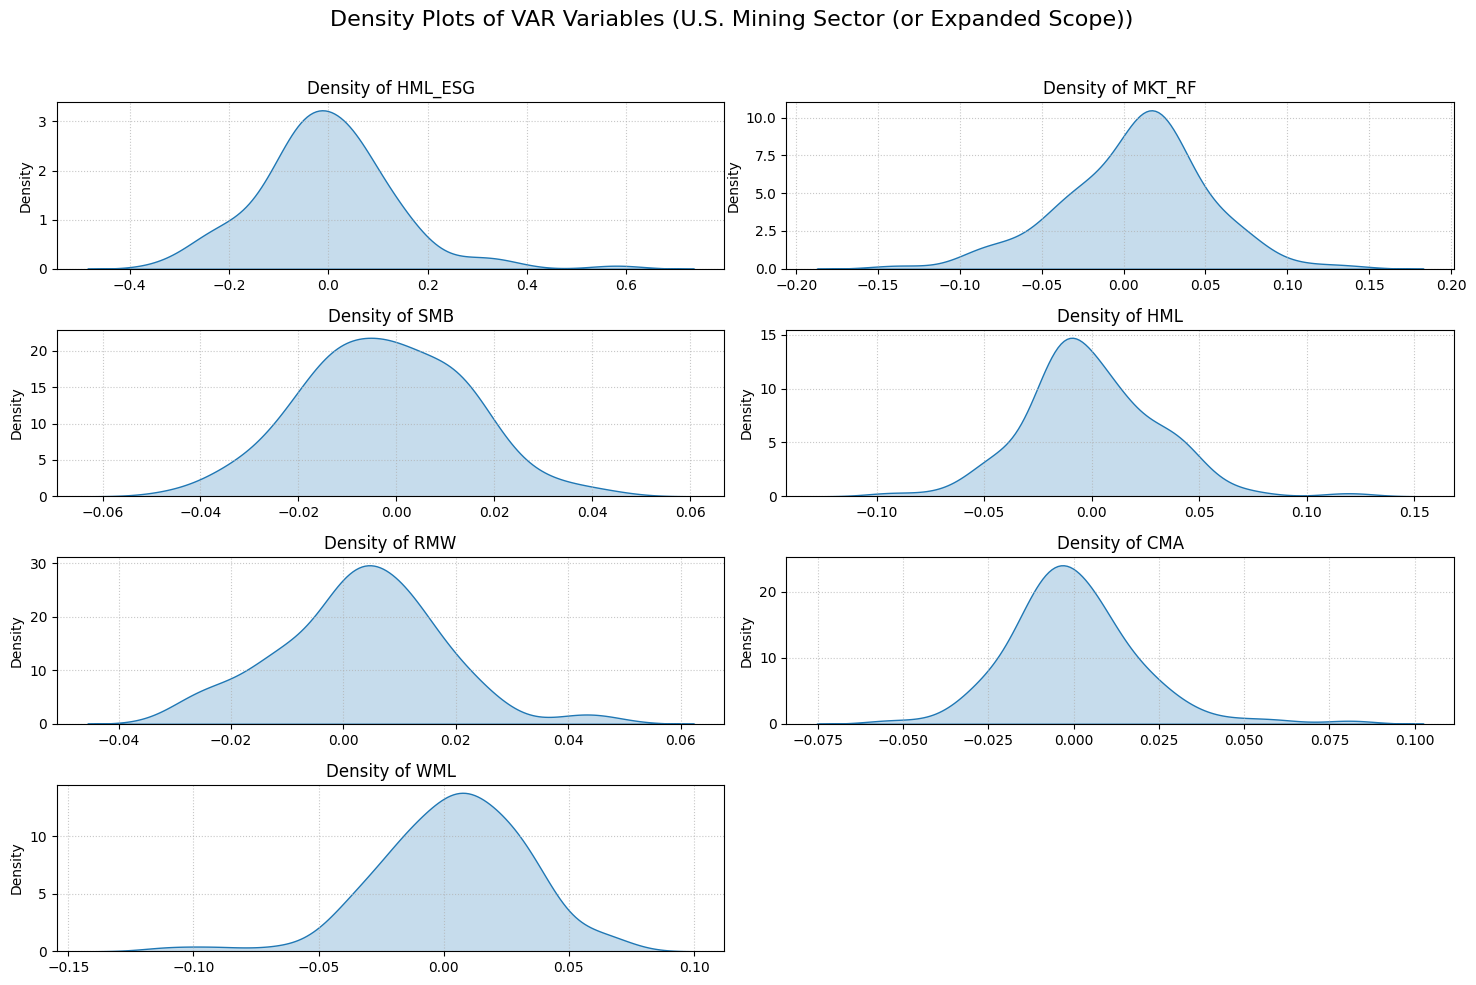


Scatter Plot Matrix for: HML_ESG, MKT_RF, SMB, HML


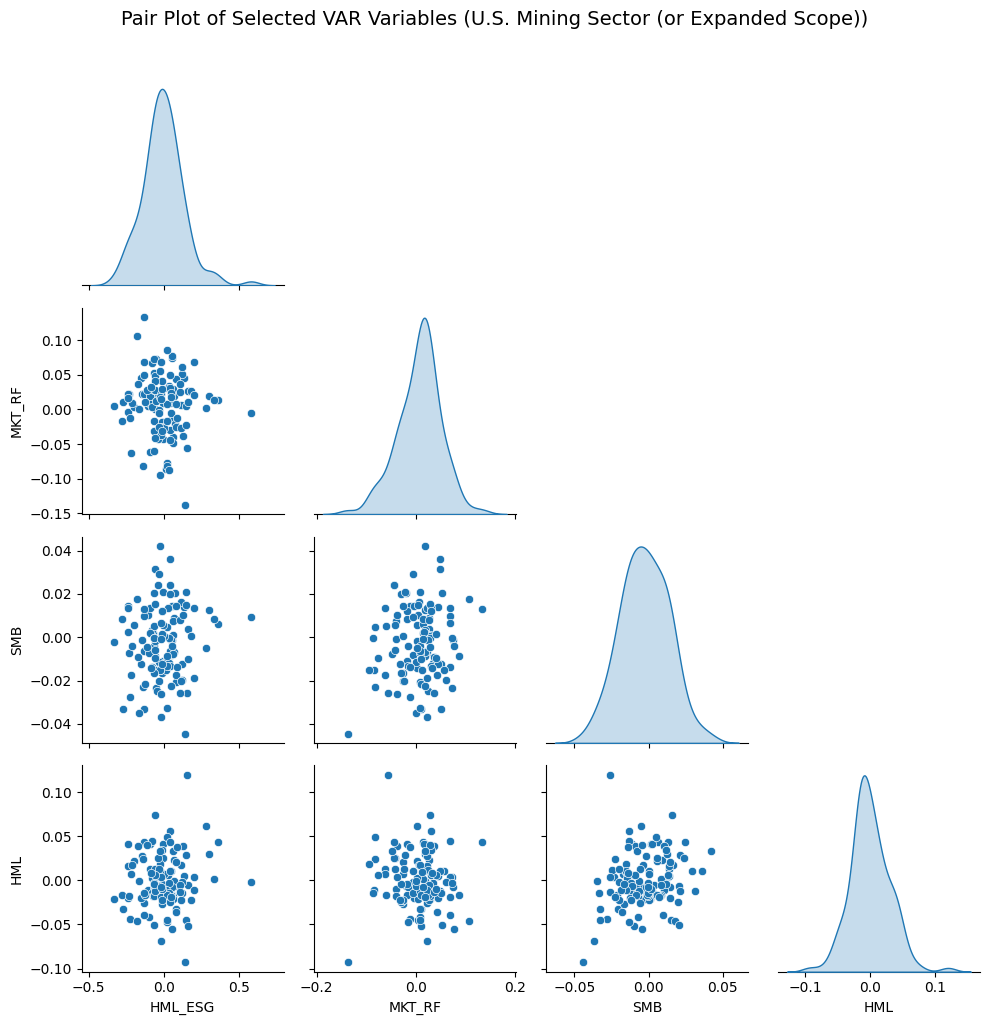

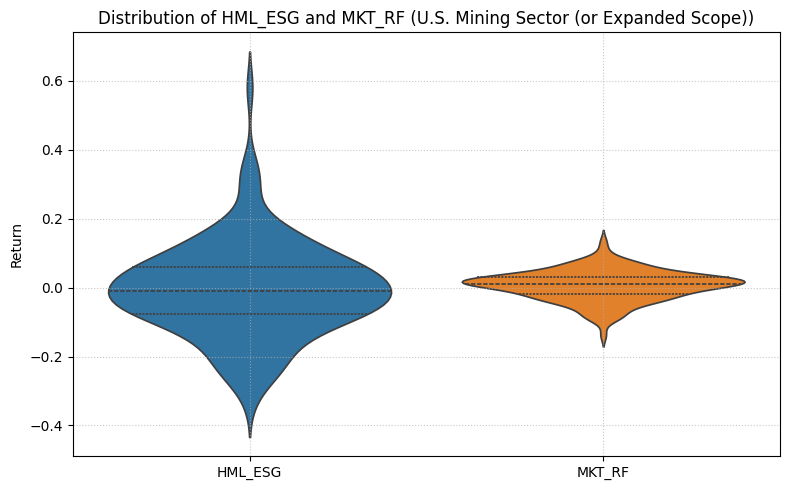

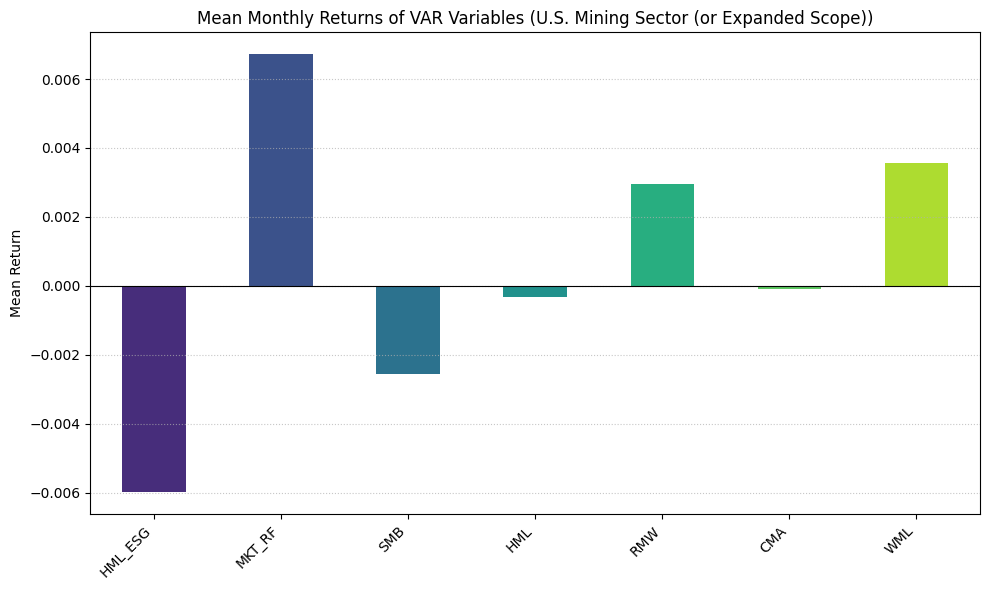


**VAR Model Diagnostics and Estimation for U.S. Mining Sector (or Expanded Scope):**
  1. Stationarity of VAR Inputs:
     - HML_ESG: ADF p-value=0.000 (Stationary)
     - MKT_RF: ADF p-value=0.000 (Stationary)
     - SMB: ADF p-value=0.000 (Stationary)
     - HML: ADF p-value=0.001 (Stationary)
     - RMW: ADF p-value=0.000 (Stationary)
     - CMA: ADF p-value=0.000 (Stationary)
     - WML: ADF p-value=0.000 (Stationary)

  2. VAR Lag Order Selection (maxlags potentially adjusted):
     Using maxlags=1 for selection.
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0     -51.29*     -51.13*  5.300e-23*     -51.23*
1      -50.94      -49.64   7.531e-23      -50.41
-------------------------------------------------
     Chosen VAR Lag Order (BIC): 1.

  3. VAR Residual Diagnostics - Durbin-Watson:
+------------+-----------------+
| Variable   |   Durbin-Watson |
+============+===========

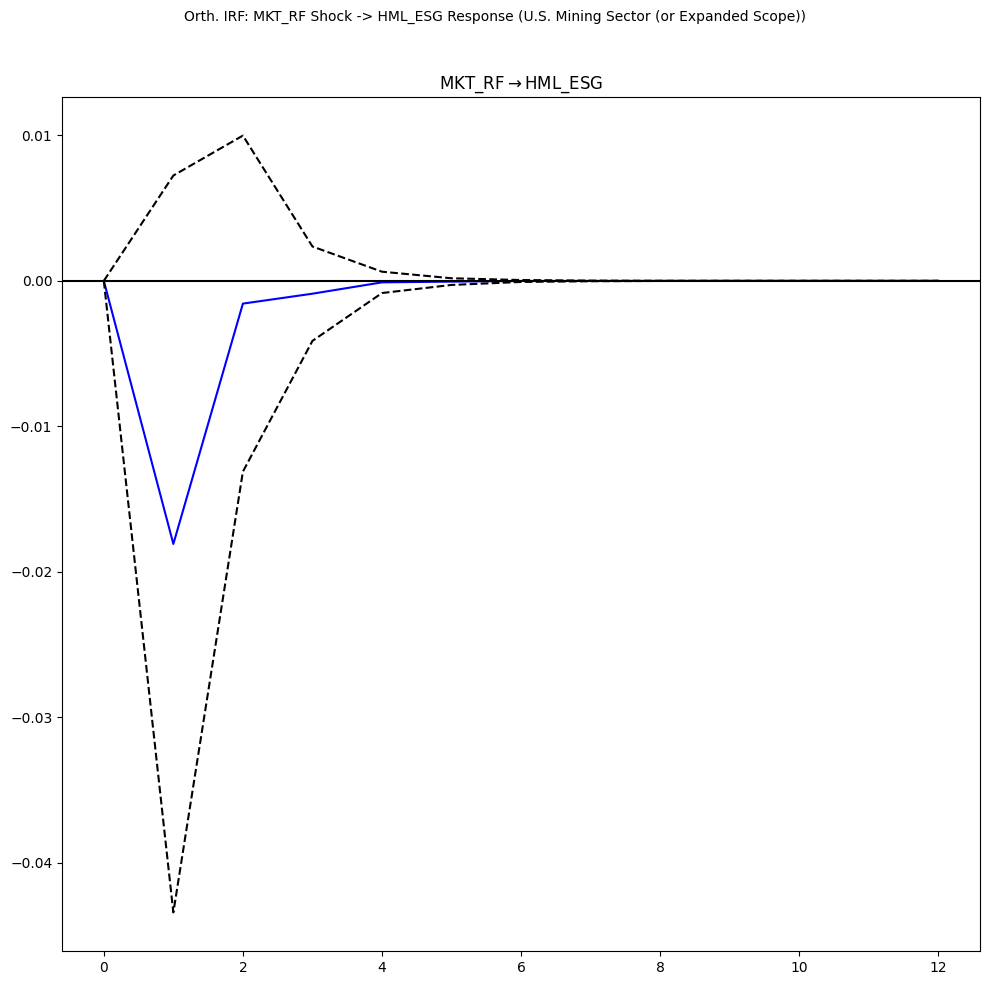

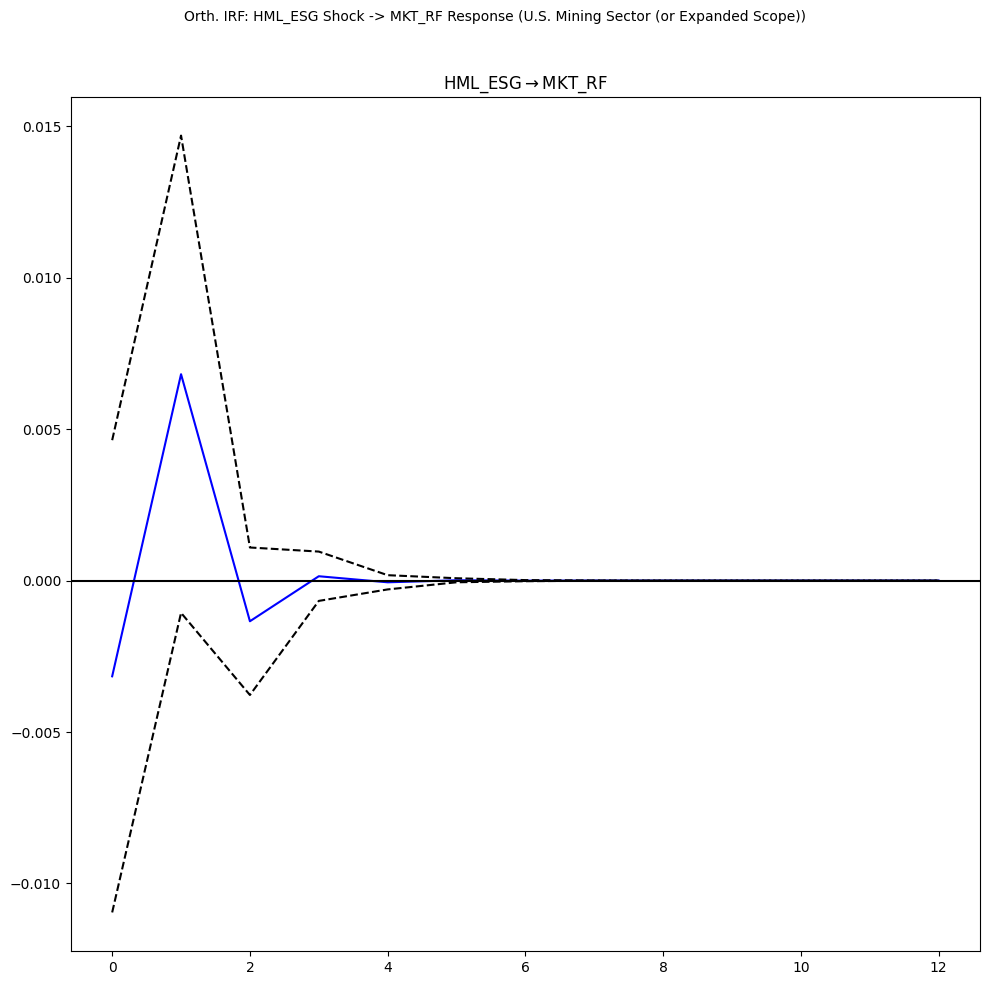

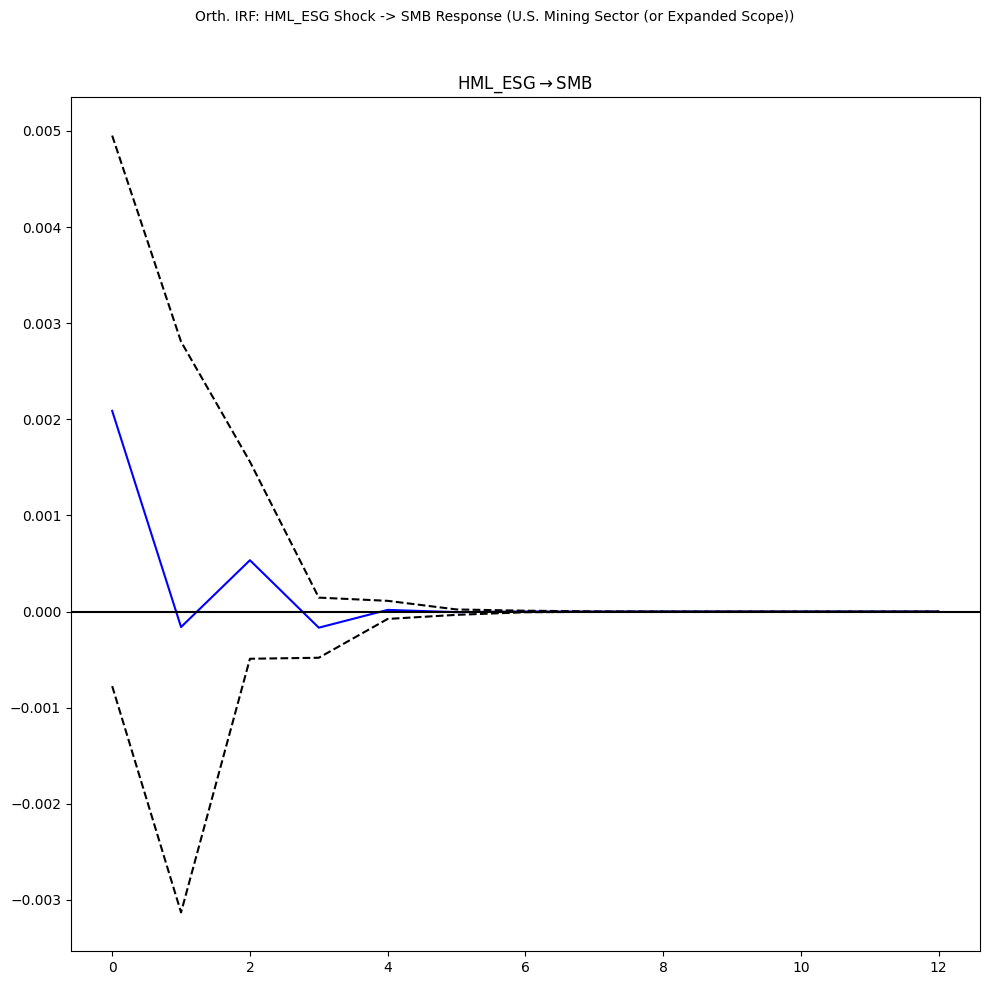


  6. Forecast Error Variance Decomposition (FEVD) Summary Tables:
FEVD for U.S. Mining Sector (or Expanded Scope) (up to 12 periods):
FEVD for HML_ESG
       HML_ESG    MKT_RF       SMB       HML       RMW       CMA       WML
0     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1     0.910704  0.016548  0.001413  0.031774  0.026503  0.012951  0.000107
2     0.906567  0.016592  0.001977  0.033801  0.027439  0.012909  0.000715
3     0.906212  0.016625  0.001997  0.033904  0.027468  0.012936  0.000858
4     0.906185  0.016625  0.002000  0.033917  0.027469  0.012936  0.000868
5     0.906183  0.016625  0.002000  0.033918  0.027469  0.012936  0.000868
6     0.906183  0.016625  0.002000  0.033918  0.027469  0.012936  0.000868
7     0.906183  0.016625  0.002000  0.033918  0.027469  0.012936  0.000868
8     0.906183  0.016625  0.002000  0.033918  0.027469  0.012936  0.000868
9     0.906183  0.016625  0.002000  0.033918  0.027469  0.012936  0.000868
10    0.906183  0.01662

In [3]:
# Install arch if running in Colab and it's not already installed
try:
    import arch
except ImportError:
    print("Installing arch library...")
    !pip install arch -q --no-input

import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
from scipy import stats
import io
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# --- 1. Setup and Data Loading ---
print("--- 1. Setup and Data Loading ---")
ff_file_path = '/content/Developed_5_Factors_Momentum.csv'
esg_file_path = '/content/historic_esg_scores_mining_re.csv'
SECTOR_NAME = "U.S. Mining Sector (or Expanded Scope)"
SECTOR_INDUSTRY_FOR_NARRATIVE = f"firms in the {SECTOR_NAME}"

try:
    ff_df = pd.read_csv(ff_file_path, sep=',')
    print(f"Fama-French data loaded successfully.")
except Exception as e: print(f"Error loading Fama-French CSV: {e}"); raise
if 'Date' not in ff_df.columns: raise ValueError("Date column missing in FF data.")
ff_df['Date'] = pd.to_datetime(ff_df['Date'], format='%m/%d/%y')
factor_cols_ff = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'WML']
for col_ff in factor_cols_ff: ff_df[col_ff] = ff_df[col_ff] / 100.0
ff_df = ff_df.rename(columns={'Mkt-RF': 'MKT_RF'})

try:
    esg_df = pd.read_csv(esg_file_path, sep=',')
    print(f"ESG data for {SECTOR_NAME} loaded successfully from original source.")
except Exception as e: print(f"Error loading ESG CSV for {SECTOR_NAME}: {e}"); raise

if 'Date' not in esg_df.columns: raise ValueError("Date column missing in ESG data.")
if 'Ticker' not in esg_df.columns: raise ValueError("Ticker column missing in ESG data.")
esg_df['Date'] = pd.to_datetime(esg_df['Date'], format='%m/%d/%y')
tickers_from_esg = esg_df['Ticker'].unique().tolist()
print(f"Tickers found in ESG data: {tickers_from_esg}")

final_tickers_to_download = tickers_from_esg

start_date_prices = ff_df['Date'].min()
end_date_prices = max(ff_df['Date'].max(), esg_df['Date'].max())
stock_prices_df = pd.DataFrame()
print(f"Attempting to download stock prices for {len(final_tickers_to_download)} tickers from {start_date_prices - pd.DateOffset(months=1)} to {end_date_prices + pd.DateOffset(days=1)}")
downloaded_tickers_count = 0
for ticker in final_tickers_to_download:
    try:
        data = yf.download(ticker, start=start_date_prices - pd.DateOffset(months=1),
                           end=end_date_prices + pd.DateOffset(days=1),
                           progress=False, auto_adjust=True, timeout=20)
        if not data.empty and 'Close' in data.columns:
            stock_prices_df[ticker] = data['Close']
            downloaded_tickers_count +=1
        elif data.empty : print(f"No data returned for {ticker} by yfinance.")
        else: print(f"Data for {ticker} downloaded but 'Close' column missing.")
    except Exception as e: print(f"yfinance error for {ticker}: {e}")

if stock_prices_df.empty: raise ValueError("No stock price data downloaded.")
print(f"\nStock prices downloaded for {downloaded_tickers_count} tickers.")
if downloaded_tickers_count < len(final_tickers_to_download):
    print(f"Warning: Could not download price data for all tickers. Expected {len(final_tickers_to_download)}, got {downloaded_tickers_count}")
    print(f"Missing tickers: {list(set(final_tickers_to_download) - set(stock_prices_df.columns))}")

# --- 2. Data Preprocessing ---
print("\n--- 2. Data Preprocessing ---")
monthly_prices = stock_prices_df.resample('ME').last()
monthly_returns = monthly_prices.pct_change().dropna(how='all')
if monthly_returns.empty: raise ValueError("Monthly returns empty.")
stock_returns_long = monthly_returns.stack().reset_index()
stock_returns_long.columns = ['Date', 'Ticker', 'Stock_Return']

for df_to_process in [stock_returns_long, ff_df, esg_df]:
    df_to_process['Date'] = pd.to_datetime(df_to_process['Date'])
    df_to_process['Date'] = df_to_process['Date'].dt.to_period('M').dt.start_time

data_merged = pd.merge(stock_returns_long, ff_df, on='Date', how='left')
if 'RF' not in data_merged.columns: raise KeyError("'RF' column not found.")
data_merged['Excess_Return'] = data_merged['Stock_Return'] - data_merged['RF']

esg_df_lagged = esg_df.copy()
esg_score_cols = ['Total-Score', 'E-Score', 'S-Score', 'G-Score']
all_esg_cols_to_process = [col for col in esg_score_cols if col in esg_df_lagged.columns]

for score_col in all_esg_cols_to_process:
    if score_col in esg_df_lagged.columns:
        if 'Score' in score_col: esg_df_lagged[score_col] = esg_df_lagged[score_col].replace(0, np.nan)
        esg_df_lagged[f'Lagged_{score_col}'] = esg_df_lagged.groupby('Ticker')[score_col].shift(1)
        esg_df_lagged[f'Lagged3M_{score_col}'] = esg_df_lagged.groupby('Ticker')[score_col].shift(3)
        esg_df_lagged[f'Lagged6M_{score_col}'] = esg_df_lagged.groupby('Ticker')[score_col].shift(6)
        esg_df_lagged[f'Avg12M_Lagged_{score_col}'] = esg_df_lagged.groupby('Ticker')[score_col].transform(
            lambda x: x.rolling(window=12, min_periods=max(1, 12//2)).mean().shift(1))

final_df = pd.merge(data_merged, esg_df_lagged, on=['Date', 'Ticker'], how='left')

key_cols_for_dropna_list = ['Excess_Return', 'MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
lagged_esg_variants = []
for s_col in all_esg_cols_to_process:
    lagged_esg_variants.extend([f'Lagged_{s_col}', f'Lagged3M_{s_col}', f'Lagged6M_{s_col}', f'Avg12M_Lagged_{s_col}'])
for lag_col in lagged_esg_variants:
    if lag_col in final_df.columns: key_cols_for_dropna_list.append(lag_col)
key_cols_for_dropna_list = list(set(key_cols_for_dropna_list))
key_cols_for_dropna_list = [col for col in key_cols_for_dropna_list if col in final_df.columns]

final_df_cleaned = final_df.dropna(subset=key_cols_for_dropna_list, how='any').copy()

if final_df_cleaned.empty:
    print("Warning: final_df_cleaned is empty after dropping NaNs.")
    raise ValueError("Cleaned DataFrame (final_df_cleaned) is empty. Cannot proceed.")

final_df_cleaned = final_df_cleaned.set_index(['Ticker', 'Date'])
print(f"Shape of cleaned data for analysis (final_df_cleaned): {final_df_cleaned.shape}")
N_entities_final = final_df_cleaned.index.get_level_values(0).nunique()
print(f"Number of unique tickers in final_df_cleaned: {N_entities_final}")
print(f"Date range in final_df_cleaned: {final_df_cleaned.index.get_level_values(1).min()} to {final_df_cleaned.index.get_level_values(1).max()}")


# --- 3. Model Selection for Panel Data and Diagnostic Tests ---
print("\n\n--- 3. Model Selection for Panel Data and Diagnostic Tests ---")
chosen_panel_model_type = "Two-Way FE (Entity & Time) with Clustered SE (Default)"
test_summary_data = []
f_pooled_decision, hausman_decision, bp_decision = "Skipped", "Skipped", "Skipped"

if final_df_cleaned.empty:
    print(f"Skipping model selection tests as final_df_cleaned is empty for {SECTOR_NAME}.")
    test_summary_data.append(["All Tests", "N/A", "final_df_cleaned empty", "Defaulting to Two-Way FE"])
else:
    panel_test_esg_var = 'Lagged_Total-Score'
    panel_test_ff_factors = ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
    if panel_test_esg_var not in final_df_cleaned.columns or final_df_cleaned[panel_test_esg_var].isnull().all():
        available_lagged_esg = [c for c in final_df_cleaned.columns if c.startswith('Lagged_') and 'Score' in c and not final_df_cleaned[c].isnull().all()]
        if available_lagged_esg: panel_test_esg_var = available_lagged_esg[0]; print(f"Using {panel_test_esg_var} for panel model selection.")
        else: panel_test_esg_var = None; print(f"No suitable lagged ESG score for model selection. Using default model choice.")
    panel_test_exog_vars = []
    if panel_test_esg_var: panel_test_exog_vars = panel_test_ff_factors + [panel_test_esg_var]; panel_test_exog_vars = [v for v in panel_test_exog_vars if v in final_df_cleaned.columns]
    panel_test_data = pd.DataFrame()
    if panel_test_exog_vars: panel_test_data = final_df_cleaned[['Excess_Return'] + panel_test_exog_vars].copy(); panel_test_data.dropna(inplace=True)
    num_entities_test = panel_test_data.index.get_level_values(0).nunique() if not panel_test_data.empty else 0
    min_obs_for_tests = (len(panel_test_exog_vars) if panel_test_exog_vars else 0) + num_entities_test + 20
    if panel_test_data.empty or panel_test_data.shape[0] < min_obs_for_tests or num_entities_test < 2 :
        print(f"Insufficient data for full panel model selection tests. Have {panel_test_data.shape[0]} obs, {num_entities_test} entities. Defaulting to Two-Way FE.")
        f_pooled_decision, hausman_decision, bp_decision = "Default", "Default", "Default"; test_summary_data.append(["All Tests", "N/A", "Insufficient data", "Defaulting to Two-Way FE"])
    else:
        Y_paneltest = panel_test_data['Excess_Return']; X_paneltest_df = sm.add_constant(panel_test_data[panel_test_exog_vars]); fe_entity_res_for_test = None
        try: # F-test
            mod_fe_entity_test = PanelOLS(Y_paneltest, X_paneltest_df, entity_effects=True, time_effects=False); fe_entity_res_for_test = mod_fe_entity_test.fit(cov_type='clustered', cluster_entity=True)
            if hasattr(fe_entity_res_for_test, 'f_pooled') and fe_entity_res_for_test.f_pooled is not None:
                f_pooled_decision = 'Entity FE significant' if fe_entity_res_for_test.f_pooled.pval < 0.05 else 'Entity FE not significant'
                test_summary_data.append(["F-test (Entity FE vs Pooled OLS)", f"{fe_entity_res_for_test.f_pooled.stat:.4f}", f"{fe_entity_res_for_test.f_pooled.pval:.4f}", f_pooled_decision])
            else: f_pooled_decision = "Test N/A"; test_summary_data.append(["F-test", "N/A", "N/A", f_pooled_decision])
        except Exception as e: f_pooled_decision = "Error"; test_summary_data.append(["F-test", "Error", str(e), f_pooled_decision]); print(f"Error F-test FE: {e}")
        try: # Hausman
            if fe_entity_res_for_test:
                mod_re_test = RandomEffects(Y_paneltest, X_paneltest_df); re_res_for_test = mod_re_test.fit(cov_type='clustered', cluster_entity=True)
                fe_coeff = fe_entity_res_for_test.params.get(panel_test_esg_var, np.nan); re_coeff = re_res_for_test.params.get(panel_test_esg_var, np.nan)
                diff = fe_coeff - re_coeff if not (pd.isna(fe_coeff) or pd.isna(re_coeff)) else np.nan; note_h = f"FE:{fe_coeff:.4f}, RE:{re_coeff:.4f}. Diff:{diff:.4f}"
                hausman_decision = "FE preferred (F-test sig.)" if f_pooled_decision.startswith('Entity FE significant') else "Choice less clear (F-test not sig.)"
                test_summary_data.append(["Hausman (Informal)", "Comparison", note_h, hausman_decision])
            else: hausman_decision = "Skipped (FE failed)"; test_summary_data.append(["Hausman (Informal)", "N/A", "FE failed", hausman_decision])
        except Exception as e: hausman_decision = "Error"; test_summary_data.append(["Hausman (Informal)", "Error", str(e), hausman_decision]); print(f"Error Hausman: {e}")
        try: # Breusch-Pagan
            if fe_entity_res_for_test:
                bp_stat, bp_pval, _, _ = het_breuschpagan(fe_entity_res_for_test.resids, fe_entity_res_for_test.model.exog.dataframe if hasattr(fe_entity_res_for_test.model.exog, 'dataframe') else fe_entity_res_for_test.model.exog.ndarray)
                bp_decision = 'Heteroskedasticity present' if bp_pval < 0.05 else 'Homoskedasticity'
                test_summary_data.append([f"Breusch-Pagan (Entity FE resid)", f"LM:{bp_stat:.2f}", f"Pval:{bp_pval:.3f}", bp_decision])
            else: bp_decision = "Skipped (FE failed)"; test_summary_data.append(["Breusch-Pagan", "N/A", "FE failed", bp_decision])
        except Exception as e: bp_decision = "Error"; test_summary_data.append(["Breusch-Pagan", "Error", str(e), bp_decision]); print(f"Error BP: {e}")
print("\n**Table: Panel Model Specification Tests Summary**"); print(tabulate(test_summary_data, headers=["Test", "Statistic", "P-value/Note", "Conclusion"], tablefmt="grid"))
print(f"\nModel Choice Justification for Panel Regressions (RQ1) for {SECTOR_NAME}:") # Narrative based on test results
if f_pooled_decision.startswith('Entity FE significant'): print("  - F-test: Entity FE significant, supports FE over Pooled OLS.")
elif f_pooled_decision.startswith('Entity FE not significant'): print("  - F-test: Entity FE not significant. RE/Pooled OLS might be considered, but Time FE often vital.")
elif f_pooled_decision == "Default": print("  - Model selection tests skipped due to limited data.")
else: print(f"  - F-test: {f_pooled_decision}.")
if hausman_decision.startswith("FE preferred"): print(f"  - Hausman (Informal): {hausman_decision}, supports FE over RE.")
elif hausman_decision not in ["Skipped", "Error", "Default", "Skipped (FE failed)"]: print(f"  - Hausman (Informal): {hausman_decision}.")
if bp_decision.startswith('Heteroskedasticity'): print("  - Breusch-Pagan: Heteroskedasticity present (use robust SE).")
elif bp_decision.startswith('Homoskedasticity'): print("  - Breusch-Pagan: Homoskedasticity (robust SE still good practice).")
elif bp_decision != "Default": print(f"  - Breusch-Pagan: {bp_decision}.")
print(f"  - **Decision for RQ1 ({SECTOR_NAME}):** Given the importance of time-varying shocks and common practice, {chosen_panel_model_type} is adopted, but results from other models are presented for robustness.")


# --- 4. Panel Data Models (RQ1: ESG Impact on Returns) ---
# (Section 4 with multiple panel models as per last correction - this should be fine)
print(f"\n\n--- 4. Panel Data Models (RQ1: ESG Impact on Returns for {SECTOR_NAME}) ---")
panel_results_summary_for_chart_data = []
all_panel_model_results = {}
if final_df_cleaned.empty: print(f"Skipping panel models for {SECTOR_NAME}: final_df_cleaned is empty.")
else:
    esg_vars_to_test_panel = []; all_esg_cols_to_process_sec4 = [col for col in ['Total-Score', 'E-Score', 'S-Score', 'G-Score'] if col in final_df_cleaned.columns] # Use columns present in final_df_cleaned
    for s_col_panel in all_esg_cols_to_process_sec4: esg_vars_to_test_panel.extend([f'Lagged_{s_col_panel}', f'Lagged3M_{s_col_panel}', f'Lagged6M_{s_col_panel}', f'Avg12M_Lagged_{s_col_panel}'])
    esg_vars_to_test_panel = [v for v in esg_vars_to_test_panel if v in final_df_cleaned.columns and final_df_cleaned[v].nunique(dropna=True) > 1]
    if not esg_vars_to_test_panel: print(f"No valid ESG variables with variance found for panel regression in {SECTOR_NAME}.")
    else:
        for esg_var in esg_vars_to_test_panel:
            print(f"\n--- Panel Regressions for {SECTOR_NAME} using: {esg_var} ---")
            current_exog_panel = [esg_var]; panel_data_subset = final_df_cleaned[['Excess_Return'] + current_exog_panel].copy().dropna()
            num_entities_model = panel_data_subset.index.get_level_values(0).nunique(); num_time_periods_model = panel_data_subset.index.get_level_values(1).nunique()
            min_obs_pooled = len(current_exog_panel) + 1 + 10; min_obs_re = len(current_exog_panel) + 1 + 10
            min_obs_fe_entity = len(current_exog_panel) + num_entities_model + 10; min_obs_fe_time = len(current_exog_panel) + num_time_periods_model + 10
            min_obs_fe_twoway = len(current_exog_panel) + num_entities_model + num_time_periods_model + 10
            if panel_data_subset.empty or num_entities_model < 1: print(f"  Skipping {esg_var}: Not enough data or entities."); continue
            X_panel_df = sm.add_constant(panel_data_subset[current_exog_panel]); Y_panel = panel_data_subset['Excess_Return']
            model_specs_to_run = []
            if panel_data_subset.shape[0] >= min_obs_pooled: model_specs_to_run.append({"name": "PooledOLS", "model_type": PooledOLS, "effects": {}})
            if panel_data_subset.shape[0] >= min_obs_re and num_entities_model > len(current_exog_panel) +1: model_specs_to_run.append({"name": "RandomEffects (Entity)", "model_type": RandomEffects, "effects": {}})
            if panel_data_subset.shape[0] >= min_obs_fe_entity and num_entities_model >= 2: model_specs_to_run.append({"name": "FixedEffects (Entity)", "model_type": PanelOLS, "effects": {'entity_effects':True, 'time_effects':False, 'drop_absorbed':True}})
            if panel_data_subset.shape[0] >= min_obs_fe_time and num_time_periods_model >= len(current_exog_panel) + 2: model_specs_to_run.append({"name": "FixedEffects (Time)", "model_type": PanelOLS, "effects": {'entity_effects':False, 'time_effects':True, 'drop_absorbed':True}})
            if panel_data_subset.shape[0] >= min_obs_fe_twoway and num_entities_model >= 2 and num_time_periods_model >= len(current_exog_panel) + num_entities_model + 2 : model_specs_to_run.append({"name": "FixedEffects (Two-Way)", "model_type": PanelOLS, "effects": {'entity_effects':True, 'time_effects':True, 'drop_absorbed':True}})
            if not model_specs_to_run: print(f"  Skipping {esg_var}: Not enough data for any robust panel model."); continue
            for spec in model_specs_to_run:
                print(f"\n  -- Running Model: {spec['name']} for {esg_var} --")
                try:
                    if spec['model_type'] == PooledOLS or spec['model_type'] == RandomEffects: mod = spec['model_type'](Y_panel, X_panel_df)
                    else: mod = spec['model_type'](Y_panel, X_panel_df, **spec['effects'])
                    res_cov_type = 'clustered'; res_cluster_entity = True; res_cluster_time = False
                    if spec['name'] == "FixedEffects (Time)": res_cluster_time = True; res_cluster_entity = False
                    elif spec['name'] == "FixedEffects (Two-Way)": res_cluster_time = True
                    if spec['name'] == "FixedEffects (Two-Way)" and res_cluster_entity and res_cluster_time:
                        try: res = mod.fit(cov_type=res_cov_type, cluster_entity=res_cluster_entity, cluster_time=res_cluster_time)
                        except Exception: res = mod.fit(cov_type=res_cov_type, cluster_entity=True); print(f"    Note: Used entity-clustered SE for Two-Way FE.")
                    elif res_cluster_entity and not res_cluster_time: res = mod.fit(cov_type=res_cov_type, cluster_entity=True)
                    elif res_cluster_time and not res_cluster_entity: res = mod.fit(cov_type=res_cov_type, cluster_time=True)
                    else: res = mod.fit(cov_type=res_cov_type, cluster_entity=True) # Default to entity cluster for Pooled/RE
                    print(res); all_panel_model_results.setdefault(esg_var, {})[spec['name']] = res.summary.as_text()
                    if esg_var in res.params and spec['name'] == "FixedEffects (Two-Way)":
                        coeff = res.params[esg_var]; pval = res.pvalues[esg_var]; significant = pval < 0.05
                        panel_results_summary_for_chart_data.append({'ESG_Variable': esg_var, 'Coefficient': coeff, 'P_Value': pval, 'Significant_5pct': significant, 'Sector': SECTOR_NAME})
                        print(f"    Summary for {esg_var} ({spec['name']}, {SECTOR_NAME}): Coeff={coeff:.6f} (P-val={pval:.4f}), Significant (5%): {significant}")
                except Exception as e: print(f"    Error running {spec['name']} for {esg_var}: {e}"); all_panel_model_results.setdefault(esg_var, {})[spec['name']] = f"Error: {e}"
if panel_results_summary_for_chart_data:
    panel_results_df_chart = pd.DataFrame(panel_results_summary_for_chart_data)
    significant_results_chart = panel_results_df_chart[panel_results_df_chart['Significant_5pct']]
    if not significant_results_chart.empty: plt.figure(figsize=(12, 7)); bars = plt.bar(significant_results_chart['ESG_Variable'], significant_results_chart['Coefficient'], color=['darkgreen' if x > 0 else 'darkred' for x in significant_results_chart['Coefficient']]); plt.ylabel('Coefficient (Impact on Monthly Excess Return)'); plt.xlabel(f'Lagged ESG Variable ({SECTOR_NAME})'); plt.title(f'Statistically Significant ESG Coefficients ({SECTOR_NAME}, Two-Way FE, 5% level)'); plt.xticks(rotation=45, ha="right"); plt.grid(axis='y', linestyle=':', alpha=0.7); [plt.text(bar_item.get_x() + bar_item.get_width()/2.0, bar_item.get_height(), f'{bar_item.get_height():.4f}', va='bottom' if bar_item.get_height() < 0 else 'top', ha='center', fontsize=8) for bar_item in bars]; plt.tight_layout(); plt.show()
    else: print(f"\nNo ESG variables found statistically significant at 5% in Two-Way FE PanelOLS models for {SECTOR_NAME} for chart.")
else: print(f"\nNo Two-Way FE panel regression results to visualize for {SECTOR_NAME}.")


# --- 5. Vector Autoregression (VAR) Analysis ---
print(f"\n\n--- 5. Vector Autoregression (VAR) Analysis (RQ2: Dynamic Interplay for {SECTOR_NAME}) ---")
var_success_flag = False; fevd = None; irf_periods = None; best_lag_order_var_val = None
var_data_merged = pd.DataFrame(); gc_table_data = []
primary_esg_for_hml_var = 'Lagged_Total-Score'
if primary_esg_for_hml_var not in final_df_cleaned.columns or final_df_cleaned[primary_esg_for_hml_var].isnull().all():
    available_esg_for_hml = [c for c in final_df_cleaned.columns if c.startswith('Lagged_') and 'Score' in c and not final_df_cleaned[c].isnull().all()]
    if available_esg_for_hml: primary_esg_for_hml_var = available_esg_for_hml[0]; print(f"Using {primary_esg_for_hml_var} for HML_ESG in VAR.")
    else: primary_esg_for_hml_var = None; print(f"Skipping VAR: No suitable non-empty lagged ESG score for HML_ESG.")

if not final_df_cleaned.empty and primary_esg_for_hml_var is not None and N_entities_final > 0 :
    def get_portfolio_returns_simple_var(data_panel_indexed_func, esg_col_name_sort_func, num_portfolios_target=2):
        if esg_col_name_sort_func not in data_panel_indexed_func.columns: return pd.DataFrame()
        if data_panel_indexed_func[esg_col_name_sort_func].isnull().all(): return pd.DataFrame()
        data_for_sort_local = data_panel_indexed_func.reset_index(); portfolio_dfs_local = []
        print(f"  Constructing HML_ESG based on {esg_col_name_sort_func}, aiming for {num_portfolios_target} portfolios if data allows.")
        for date_val_local, group_local in data_for_sort_local.groupby('Date'):
            valid_esg_scores_group = group_local.dropna(subset=[esg_col_name_sort_func, 'Excess_Return'])
            n_firms_this_period = valid_esg_scores_group['Ticker'].nunique()
            if n_firms_this_period >= num_portfolios_target * 2 and n_firms_this_period >= 5 and num_portfolios_target >=5 : n_portfolios_this_period = 5
            elif n_firms_this_period >= num_portfolios_target * 2 and n_firms_this_period >= 3 and num_portfolios_target >=3: n_portfolios_this_period = 3
            else: n_portfolios_this_period = 2
            if valid_esg_scores_group[esg_col_name_sort_func].nunique() < n_portfolios_this_period or valid_esg_scores_group.shape[0] < n_portfolios_this_period : continue
            try:
                labels_local = [f'P{i+1}' for i in range(n_portfolios_this_period)]
                valid_esg_scores_group['Portfolio'] = pd.qcut(valid_esg_scores_group[esg_col_name_sort_func].rank(method='first', pct=True), n_portfolios_this_period, labels=labels_local, duplicates='drop')
                if valid_esg_scores_group['Portfolio'].nunique() < n_portfolios_this_period: continue
                port_returns_this_date_local = valid_esg_scores_group.groupby('Portfolio', observed=False)['Excess_Return'].mean()
                if labels_local[0] in port_returns_this_date_local and labels_local[-1] in port_returns_this_date_local:
                    portfolio_dfs_local.append(pd.DataFrame([{'Date': date_val_local, 'HML_ESG_Ret_VAR': port_returns_this_date_local[labels_local[-1]] - port_returns_this_date_local[labels_local[0]]}]))
            except Exception: continue
        if not portfolio_dfs_local: print(f"Warning: No HML_ESG portfolio returns calculated for {SECTOR_NAME} using {esg_col_name_sort_func}."); return pd.DataFrame()
        return pd.concat(portfolio_dfs_local).set_index('Date').dropna(subset=['HML_ESG_Ret_VAR'])
    hml_portfolios_target = 5 if N_entities_final >= 15 else (3 if N_entities_final >= 9 else 2)
    portfolio_returns_for_var = get_portfolio_returns_simple_var(final_df_cleaned, primary_esg_for_hml_var, num_portfolios_target=hml_portfolios_target)

    if not portfolio_returns_for_var.empty and 'HML_ESG_Ret_VAR' in portfolio_returns_for_var.columns:
        var_data_hml_esg = portfolio_returns_for_var[['HML_ESG_Ret_VAR']].rename(columns={'HML_ESG_Ret_VAR':'HML_ESG'})
        ff_df_for_var_join = ff_df.set_index('Date'); var_data_hml_esg.index = pd.to_datetime(var_data_hml_esg.index)
        var_data_merged = var_data_hml_esg.join(ff_df_for_var_join[['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']], how='inner').dropna()
        print(f"Shape of data for VAR analysis (var_data_merged) for {SECTOR_NAME}: {var_data_merged.shape}")

        if var_data_merged.shape[0] < 30:
            print(f"Not enough observations ({var_data_merged.shape[0]}) for VAR analysis in {SECTOR_NAME}. Min 30 required.")
        else: # VAR analysis block
            var_success_flag = True
            print(f"\n**VAR Data Visualizations for {SECTOR_NAME}:**")
            plt.figure(figsize=(15, 10))
            for i, col in enumerate(var_data_merged.columns):
                plt.subplot((len(var_data_merged.columns) + 1) // 2, 2, i + 1)
                var_data_merged[col].plot(title=col); plt.grid(True, linestyle=':', alpha=0.7)
            plt.suptitle(f'Time Series of VAR Variables ({SECTOR_NAME})', fontsize=16); plt.tight_layout(rect=[0,0,1,0.96]); plt.show()

            plt.figure(figsize=(15, 10))
            for i, col in enumerate(var_data_merged.columns):
                plt.subplot((len(var_data_merged.columns) + 1) // 2, 2, i + 1)
                sns.kdeplot(var_data_merged[col], fill=True); plt.title(f'Density of {col}'); plt.xlabel(''); plt.ylabel('Density'); plt.grid(True, linestyle=':', alpha=0.7)
            plt.suptitle(f'Density Plots of VAR Variables ({SECTOR_NAME})', fontsize=16); plt.tight_layout(rect=[0,0,1,0.96]); plt.show()

            pair_plot_vars = ['HML_ESG', 'MKT_RF'] + [c for c in ['SMB', 'HML', 'WML'] if c in var_data_merged.columns][:2]
            pair_plot_vars = [v for v in pair_plot_vars if v in var_data_merged.columns]
            if len(pair_plot_vars) > 1:
                print(f"\nScatter Plot Matrix for: {', '.join(pair_plot_vars)}"); sns.pairplot(var_data_merged[pair_plot_vars], diag_kind='kde', corner=True)
                plt.suptitle(f'Pair Plot of Selected VAR Variables ({SECTOR_NAME})', y=1.02, fontsize=14); plt.tight_layout(); plt.show()

            if 'HML_ESG' in var_data_merged.columns and 'MKT_RF' in var_data_merged.columns:
                plt.figure(figsize=(8, 5)); sns.violinplot(data=var_data_merged[['HML_ESG', 'MKT_RF']], inner='quartile')
                plt.title(f'Distribution of HML_ESG and MKT_RF ({SECTOR_NAME})'); plt.ylabel('Return'); plt.grid(True, linestyle=':', alpha=0.7); plt.tight_layout(); plt.show()

            plt.figure(figsize=(10, 6)); var_data_merged.mean().plot(kind='bar', color=sns.color_palette("viridis", len(var_data_merged.columns)))
            plt.title(f'Mean Monthly Returns of VAR Variables ({SECTOR_NAME})'); plt.ylabel('Mean Return'); plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y', linestyle=':', alpha=0.7); plt.axhline(0, color='black', linewidth=0.8); plt.tight_layout(); plt.show()

            print(f"\n**VAR Model Diagnostics and Estimation for {SECTOR_NAME}:**")
            print("  1. Stationarity of VAR Inputs:")
            all_stationary_var = True # Assume true initially
            for col_name_var in var_data_merged.columns:
                try:
                    adf_result_var_check = adfuller(var_data_merged[col_name_var].dropna())
                    is_stationary = adf_result_var_check[1] < 0.05
                    print(f"     - {col_name_var}: ADF p-value={adf_result_var_check[1]:.3f} ({'Stationary' if is_stationary else 'Non-Stationary'})")
                    if not is_stationary: all_stationary_var = False
                except Exception as e_adf: print(f"     - {col_name_var}: Error during ADF test: {e_adf}"); all_stationary_var = False
            if not all_stationary_var: print("     Warning: Some series for VAR are non-stationary. Consider differencing or VECM.")

            model_var_select = VAR(var_data_merged)
            try:
                print("\n  2. VAR Lag Order Selection (maxlags potentially adjusted):")
                max_lags_var = min(6, int(var_data_merged.shape[0] / (len(var_data_merged.columns)**2) / 1.5) - 1 ); max_lags_var = max(1, max_lags_var)
                print(f"     Using maxlags={max_lags_var} for selection.")
                selected_lags_var_info = model_var_select.select_order(maxlags=max_lags_var)
                print(selected_lags_var_info.summary())
                best_lag_order_var_val = selected_lags_var_info.bic
                if best_lag_order_var_val == 0: best_lag_order_var_val = 1
                print(f"     Chosen VAR Lag Order (BIC): {best_lag_order_var_val}.")
                var_model_fitted = model_var_select.fit(best_lag_order_var_val)

                print("\n  3. VAR Residual Diagnostics - Durbin-Watson:")
                dw_results_var = durbin_watson(var_model_fitted.resid); dw_df_var_data = [[col, f"{val:.4f}"] for col, val in zip(var_data_merged.columns, dw_results_var)]
                print(tabulate(dw_df_var_data, headers=["Variable", "Durbin-Watson"], tablefmt="grid"))

                print("\n  4. Granger Causality Tests:")
                gc_table_data = []
                hml_esg_col_name = 'HML_ESG'
                if hml_esg_col_name in var_data_merged.columns:
                    causing_ff_vars = [v for v in var_data_merged.columns if v != hml_esg_col_name]
                    if causing_ff_vars:
                        try:
                            gc_res_ff_to_esg = var_model_fitted.test_causality(caused=hml_esg_col_name, causing=causing_ff_vars, kind='f', signif=0.05)
                            gc_table_data.append([f"{', '.join(causing_ff_vars)} -> {hml_esg_col_name}", f"{gc_res_ff_to_esg.test_statistic:.2f}", f"{gc_res_ff_to_esg.pvalue:.3f}", gc_res_ff_to_esg.conclusion=='reject'])
                        except Exception as e_gc_1: gc_table_data.append([f"{', '.join(causing_ff_vars)} -> {hml_esg_col_name}", "Error", str(e_gc_1).split('\n')[0], "N/A"])
                    for ff_var_caused in causing_ff_vars:
                        try:
                            gc_res_esg_to_ff = var_model_fitted.test_causality(caused=ff_var_caused, causing=hml_esg_col_name, kind='f', signif=0.05)
                            gc_table_data.append([f"{hml_esg_col_name} -> {ff_var_caused}", f"{gc_res_esg_to_ff.test_statistic:.2f}", f"{gc_res_esg_to_ff.pvalue:.3f}", gc_res_esg_to_ff.conclusion=='reject'])
                        except Exception as e_gc_2: gc_table_data.append([f"{hml_esg_col_name} -> {ff_var_caused}", "Error", str(e_gc_2).split('\n')[0], "N/A"])
                else: print(f"     HML_ESG column ('{hml_esg_col_name}') not found. Skipping Granger tests.")
                if gc_table_data: print(tabulate(gc_table_data, headers=["Causality Direction", "F-Stat", "P-Value", "Significant (5%)"], tablefmt="grid"))
                else: print("     No Granger causality tests were successfully run or produced results.")

                print("\n  5. Impulse Response Functions (IRFs):")
                try:
                    irf_periods = min(12, var_data_merged.shape[0] - best_lag_order_var_val - 5); irf_periods = max(5, irf_periods)
                    print(f"     Plotting IRFs for {irf_periods} periods.")
                    irf = var_model_fitted.irf(periods=irf_periods)
                    if 'MKT_RF' in var_data_merged.columns and 'HML_ESG' in var_data_merged.columns:
                        fig1 = irf.plot(impulse='MKT_RF', response='HML_ESG', orth=True, signif=0.05);
                        if isinstance(fig1, plt.Figure): fig1.suptitle(f"Orth. IRF: MKT_RF Shock -> HML_ESG Response ({SECTOR_NAME})", fontsize=10); plt.tight_layout(rect=[0,0,1,0.96]); plt.show()
                        fig2 = irf.plot(impulse='HML_ESG', response='MKT_RF', orth=True, signif=0.05);
                        if isinstance(fig2, plt.Figure): fig2.suptitle(f"Orth. IRF: HML_ESG Shock -> MKT_RF Response ({SECTOR_NAME})", fontsize=10); plt.tight_layout(rect=[0,0,1,0.96]); plt.show()
                    if 'SMB' in var_data_merged.columns and 'HML_ESG' in var_data_merged.columns: # Example of another IRF
                        fig3 = irf.plot(impulse='HML_ESG', response='SMB', orth=True, signif=0.05);
                        if isinstance(fig3, plt.Figure): fig3.suptitle(f"Orth. IRF: HML_ESG Shock -> SMB Response ({SECTOR_NAME})", fontsize=10); plt.tight_layout(rect=[0,0,1,0.96]); plt.show()
                except Exception as e_irf: print(f"     Could not compute/plot IRFs for {SECTOR_NAME}: {e_irf}")

                print("\n  6. Forecast Error Variance Decomposition (FEVD) Summary Tables:")
                try:
                    if irf_periods is not None and irf_periods > 0 :
                        fevd = var_model_fitted.fevd(periods=irf_periods)
                        print(f"FEVD for {SECTOR_NAME} (up to {irf_periods} periods):")
                        print(fevd.summary())
                    else: print("     Skipping FEVD due to invalid periods for IRF.")
                except Exception as e_fevd_calc: print(f"     Could not compute or display FEVD for {SECTOR_NAME}: {e_fevd_calc}")
            except Exception as e_var_fit:
                print(f"Error during VAR model fitting or subsequent analysis for {SECTOR_NAME}: {e_var_fit}")
                var_model_fitted = None; best_lag_order_var_val = None; irf_periods = None; fevd = None; gc_table_data = []
    else:
        print(f"Skipping VAR for {SECTOR_NAME}: HML_ESG portfolio could not be formed or insufficient data after merging.")
elif final_df_cleaned.empty:
    print(f"Skipping VAR for {SECTOR_NAME}: final_df_cleaned is empty.")
else:
    print(f"Skipping VAR for {SECTOR_NAME}: Conditions not met (e.g. no ESG var for HML, N_entities_final=0, or primary_esg_for_hml_var is None).")


# --- 4.BIS. Time-Series Alpha of HML_ESG Factor (if VAR runs) ---
if 'var_success_flag' in locals() and var_success_flag and not var_data_merged.empty and 'HML_ESG' in var_data_merged.columns:
    print("\n\n--- 4.BIS. Time-Series Alpha of HML_ESG Factor ---")
    print(f"Regressing the constructed HML_ESG factor (from {N_entities_final} firms, using {primary_esg_for_hml_var}) on Fama-French-Momentum factors.")
    y_hml_esg = var_data_merged['HML_ESG']
    ff_cols_for_alpha_reg = [col for col in ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML'] if col in var_data_merged.columns]
    if not ff_cols_for_alpha_reg: print("  Skipping HML_ESG alpha regression: No FF factors available.")
    else:
        X_ff_factors = sm.add_constant(var_data_merged[ff_cols_for_alpha_reg])
        try:
            ts_model = sm.OLS(y_hml_esg, X_ff_factors).fit(cov_type='HAC', cov_kwds={'maxlags': int(np.floor(4*(len(y_hml_esg)/100)**(2/9)))})
            print(ts_model.summary())
            hml_esg_alpha_monthly = ts_model.params.get('const', np.nan); hml_esg_alpha_pval = ts_model.pvalues.get('const', np.nan)
            if not pd.isna(hml_esg_alpha_monthly):
                hml_esg_alpha_annualized = hml_esg_alpha_monthly * 12
                print(f"\n  HML_ESG Monthly Alpha: {hml_esg_alpha_monthly*100:.4f}% (p-value: {hml_esg_alpha_pval:.4f})")
                print(f"  HML_ESG Annualized Alpha: {hml_esg_alpha_annualized*100:.2f}%")
                if hml_esg_alpha_pval < 0.05: print("  The HML_ESG alpha is statistically significant at the 5% level.")
                elif hml_esg_alpha_pval < 0.10: print("  The HML_ESG alpha is statistically significant at the 10% level.")
                else: print("  The HML_ESG alpha is NOT statistically significant at conventional levels.")
            else: print("  Could not extract HML_ESG alpha or p-value.")
        except Exception as e: print(f"  Error during HML_ESG alpha regression: {e}")
else:
    if 'var_success_flag' not in locals() or not var_success_flag : print("\nSkipping HML_ESG alpha calculation as VAR did not run successfully.")
    elif 'var_data_merged' in locals() and var_data_merged.empty : print("\nSkipping HML_ESG alpha calculation as var_data_merged is empty.")
    elif 'var_data_merged' in locals() and 'HML_ESG' not in var_data_merged.columns: print("\nSkipping HML_ESG alpha calculation as HML_ESG column is not in var_data_merged.")


# --- 6. Structuring the Narrative for High Impact ---
print(f"\n\n--- 6. Key Findings and Implications for High-Impact Research ({SECTOR_NAME}) ---")
print(f"\n**Research Question 1: Impact of ESG Scores on Stock Excess Returns for {SECTOR_NAME}**")
print(f"Methodology: Panel data models (including Fixed Effects, Random Effects, and Pooled OLS with clustered standard errors) were employed for {SECTOR_INDUSTRY_FOR_NARRATIVE}. The choice of preferred model was guided by diagnostic tests (F-test, Hausman) and theoretical considerations, with results from alternative specifications presented for robustness.")
num_tickers_cleaned_for_narrative = N_entities_final if 'N_entities_final' in locals() else 'N/A'
print(f"Key Findings (Panel Models for {SECTOR_NAME}):")
print(f"  - [USER TO INTERPRET AND SUMMARIZE SIGNIFICANT/NON-SIGNIFICANT ESG EFFECTS ACROSS MODELS, NOTING THE NUMBER OF FIRMS ({num_tickers_cleaned_for_narrative}) AND WHICH ESG SCORES (TOTAL, E, S, G, OR ALTERNATIVE MEASURES) WERE TESTED.]")
print(f"  - [IF N_entities_final ({num_tickers_cleaned_for_narrative}) IS STILL LOW, EMPHASIZE THIS LIMITATION REPEATEDLY.]")
print(f"Implications for RQ1 ({SECTOR_NAME}):")
print(f"  - [USER TO DISCUSS IMPLICATIONS: e.g., If ESG is significant: 'This suggests that {{SPECIFIC ESG DIMENSION}} is financially material for mining firms...']")
print(f"  - [e.g., If ESG is not significant: 'The lack of significance, potentially due to a small sample of {num_tickers_cleaned_for_narrative} firms or specific characteristics of the mining sector where commodity prices dominate, suggests that...']")

print(f"\n**Research Question 2: Dynamic Interplay between an ESG Factor (HML_ESG) and Market Factors for {SECTOR_NAME}**")
var_ran_successfully = var_success_flag if 'var_success_flag' in locals() else False
if not var_ran_successfully:
    print(f"Methodology: VAR analysis was planned but could not be fully executed for {SECTOR_NAME} due to data limitations or other preceding errors.")
    print(f"Key Findings (VAR for {SECTOR_NAME}): Not available.")
    print(f"Implications for RQ2 ({SECTOR_NAME}): Cannot be determined.")
else:
    best_lag_order_var_val_report = best_lag_order_var_val if 'best_lag_order_var_val' in locals() and best_lag_order_var_val is not None else 'N/A'
    primary_esg_var_report = primary_esg_for_hml_var if 'primary_esg_for_hml_var' in locals() and primary_esg_for_hml_var is not None else 'Selected ESG Var'
    hml_portfolios_report = hml_portfolios_target if 'hml_portfolios_target' in locals() else 'N/A'
    hml_construction_detail = f"HML_ESG factor based on {primary_esg_var_report} using up to {hml_portfolios_report} portfolios"
    print(f"Methodology: A Vector Autoregression (VAR) model, typically VAR({best_lag_order_var_val_report}), was estimated using monthly returns of an {hml_construction_detail} for {SECTOR_NAME}, and the six Fama-French-Momentum factors. Model selection was guided by information criteria (e.g., BIC), and residuals were checked for serial correlation.")
    print(f"Key Findings (VAR for {SECTOR_NAME}):")
    print(f"  - VAR Data Characteristics: [USER TO INTERPRET TIME SERIES PLOTS, DENSITY PLOTS, SCATTER PLOTS - e.g., 'The HML_ESG factor showed {{higher/lower/comparable}} volatility compared to MKT_RF...', 'Distributions appeared {{normal/skewed/etc.}}...']")
    print(f"  - Granger Causality: [USER TO SUMMARIZE GRANGER RESULTS - e.g., Based on the table: {{Summarize if HML_ESG causes/is caused by FF factors, noting p-values}}.]") # Modified placeholder
    print(f"  - Impulse Response Functions (IRFs): [USER TO INTERPRET IRF PLOTS - e.g., 'A one S.D. shock to MKT_RF led to a {{temporary negative/positive/insignificant/persistent}} response in HML_ESG over X periods...']")
    print(f"  - Forecast Error Variance Decomposition (FEVD) for HML_ESG ({SECTOR_NAME}):")
    if 'fevd' in locals() and fevd is not None and hasattr(fevd, 'decomp') and 'HML_ESG' in fevd.decomp:
        try:
            hml_esg_fevd_array = fevd.decomp['HML_ESG']; var_names_in_order = fevd.model.endog_names
            num_periods_fevd_actual = hml_esg_fevd_array.shape[0]
            last_period_fevd_values = hml_esg_fevd_array[-1, :]; hml_esg_idx = var_names_in_order.index('HML_ESG')
            own_variance_explained = last_period_fevd_values[hml_esg_idx]
            print(f"    - Approximately {own_variance_explained*100:.1f}% of HML_ESG's forecast error variance (at period {num_periods_fevd_actual-1 if num_periods_fevd_actual > 0 else 0}) is explained by its own past innovations.")
            if 'MKT_RF' in var_names_in_order:
                mkt_rf_idx = var_names_in_order.index('MKT_RF'); mkt_rf_contribution = last_period_fevd_values[mkt_rf_idx]
                print(f"    - MKT_RF contributed about {mkt_rf_contribution*100:.1f}% to HML_ESG's variance (at period {num_periods_fevd_actual-1 if num_periods_fevd_actual > 0 else 0}).")
        except Exception as e_fevd_sum_narr: print(f"    - Could not extract specific FEVD details for narrative: {e_fevd_sum_narr}")
    else: print(f"    - FEVD results for HML_ESG were not available or HML_ESG was not in the model's decomposition data for detailed narrative summary. Check VAR logs.")
    print(f"Implications for RQ2 ({SECTOR_NAME}):")
    print(f"  - [USER TO DISCUSS VAR IMPLICATIONS - e.g., 'The {{independence/interconnectedness}} of the HML_ESG factor implies that ESG considerations in mining represent a {{distinct/correlated}} risk dimension not fully captured by traditional factors...']")

print(f"\n**Overall Contributions and High-Impact Value Proposition for {SECTOR_NAME}:**")
print("  - Academic/Scientific:")
print(f"    1. Sector-Specific ESG Alpha ({SECTOR_NAME}): [USER TO REFINE BASED ON FINDINGS - e.g., 'Provided {{robust/preliminary}} evidence {{for/against}} an ESG premium in mining, considering various model specifications and {{number}} firms...']")
print(f"    2. ESG Component/Alternative Measure Differentiation ({SECTOR_NAME}): [USER TO REFINE - e.g., 'Attempted to highlight the role of {{specific ESG measure, e.g., E-score or Emissions_Intensity}} over generic scores, though findings were {{conclusive/inconclusive due to data limitations}}...']")
print(f"    3. ESG Factor Dynamics ({SECTOR_NAME}): [USER TO REFINE - e.g., 'Demonstrated the {{nature: independent/interactive}} of the ESG factor's relationship with market risks for the {{SECTOR_NAME}}...']")
print("  - Societal/Practical: [USER TO TAILOR BASED ON FINDINGS AND MINING CONTEXT]")
print(f"    - Mining Sector Context: [USER TO ELABORATE: Discuss specific ESG challenges and opportunities in mining – e.g., land rehabilitation, water management, indigenous community engagement, transition minerals, tailings management, biodiversity. How do the findings (or lack thereof) relate to these practical issues? What are the implications for sustainable mining practices and investment decisions?]")

print("\nKey Limitations to Emphasize:")
num_tickers_cleaned_limit = N_entities_final if 'N_entities_final' in locals() else 'N/A'
print(f"  - Data Availability and Quality: The success of dataset expansion efforts is paramount. The current analysis is based on {num_tickers_cleaned_limit} firms; if this number remains small, it severely limits the robustness and generalizability of all findings.")
print(f"  - ESG Data Source and Scope: Specificity to the ESG data used (original, expanded, alternative). Clear definition of geographic scope if changed from 'U.S. Mining Sector'. The definition and measurement of 'ESG' itself can vary significantly.")
print(f"  - Model Robustness: Findings' sensitivity to panel model specification (FE, RE, Pooled) and VAR parameters (lag length, HML_ESG construction). The choice of Two-Way FE as default for panel models should be critically assessed if N is very small and diagnostic tests suggest otherwise.")
print(f"  - Endogeneity: While FE models address time-invariant unobserved heterogeneity, other forms of endogeneity (e.g., simultaneity, omitted time-varying variables correlated with ESG) might persist and are not addressed by System GMM in this script version.")
print(f"  - Generalizability: Findings are specific to the {SECTOR_INDUSTRY_FOR_NARRATIVE} and the sample period. Results may not apply to other sectors or timeframes.")
print(f"  - VAR Model Parsimony: The choice of VAR lag length (e.g., BIC often chooses short lags) can influence conclusions about dynamic interplay; richer dynamics might exist at longer lags if supported by data (which requires more observations). The HML_ESG factor's stability and representativeness depend heavily on the number of firms used in its construction each period.")

print(f"\n--- Project Script Execution Complete for {SECTOR_NAME} ---")
if 'plt' in globals() and hasattr(plt, 'show') and callable(plt.show):
    plt.show()